In [1]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as dis
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance as dist

In [2]:
basepath = "/Users/kazuki/Documents/Study/data/ryukyu/{}"
basepath2= "/Users/kazuki/Downloads/{}"
rflocate = basepath.format("parameter/locations.xlsx")
rfwords  = basepath.format("parameter/sheetlist.xlsx")

In [3]:
locateDf = pd.read_excel(rflocate, sheet_name=0, header=0, index_col=0)
wordsDf  = pd.read_excel(rfwords , sheet_name=0, header=0, index_col=0)

In [4]:
locates = list(locateDf.iloc[:,2])
words   = list(wordsDf.iloc[:,0])
kensaku= list(locateDf.iloc[:,1])

## ある地点を起点とした変遷

In [5]:
rf=basepath.format("gramTri/pattern/all/{}.xlsx")
wf=basepath.format("gramTri/pattern2/all/{}.xlsx")

In [9]:
tmpDf=[0 for i in locates]
for lj,locate2 in enumerate(locates):
    triDf=pd.read_excel(rf.format(locate2), sheet_name=0, header=0, index_col=0)
    for li,locate1 in enumerate(locates):
        if lj==0:
            tmp=triDf[locate1].values
            tmpDf[li]=pd.DataFrame(tmp,index=triDf.index, columns=[locate2])
        else:
            tmpDf[li][locate2]=triDf[locate1]
    print(locate2)

想定形
奄美笠利
奄美金久
奄美中勝
奄美大和浜
奄美西仲間
奄美宇検
瀬戸管鈍
瀬戸武名
瀬戸嘉鉄
瀬戸渡連
喜界志戸桶
喜界阿伝
喜界湾
徳之浅間
徳之亀徳
徳之伊仙
沖永和泊
沖永知名
与論茶花
伊平我喜屋
伊是諸見
伊江東江前
国頭辺土名
国頭辺野喜
大宜根路銘
今帰与那嶺
本部備瀬
本部浜元
名護川上
名護大兼
恩納恩納
金武金武
読谷古堅
石川石川
沖縄胡屋
うる具志川
うる与那城
うる平安座
北谷北谷
北中屋宜
宜湾普天間
宜湾大山
浦添安波茶
西原小波津
うる津堅
那覇当蔵士
那覇当蔵平
那覇泉崎士
那覇泉崎平
那覇安里
南風兼城
与那与那原
南城古堅2
南城佐敷
南城知念
南城久高
南城玉城
南城糸数
八重具志頭
八重友寄
糸満米須
糸満喜屋武
糸満真壁
糸満国吉
糸満兼城
豊見保栄茂
那覇安次嶺
渡嘉阿波連
座間阿嘉
粟国浜
渡名喜西
久米真謝
久米兼城
宮古池間
宮古大神
宮古狩俣
宮古東仲宗
宮古与那覇
宮古宮国
宮古伊良部
多良間仲筋
石垣登野城
石垣大浜
石垣宮良
石垣平久保
石垣富野
竹富竹富
竹富黒島
竹富小浜
西表古見
西表干立
新城下地
波照間名石
与那国祖納
与那国比川


In [10]:
for i,locate1 in enumerate(locates):
    with pd.ExcelWriter(wf.format(locate1), engine='openpyxl') as writer:
        tmpDf[i].to_excel(writer,sheet_name=locate1) #シート名[地点名]

## 作成し直したデータからのデンドロ

In [5]:
rfpattern=basepath.format("gramTri/pattern2/all/{}.xlsx")
datas=[0 for i in locates]
print(datas)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
for li,locate in enumerate(locates):
    triDf=pd.read_excel(rfpattern.format(locate), sheet_name=0, header=0, index_col=0)
    alp=len(triDf.index)*len(locates)
    tmp=triDf.values
    datas[li]=tmp.flatten()

In [16]:
for i,locate in enumerate(locates):
    datas[i]=datas[i].flatten()
print(datas)

[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kazuki/Documents/Study/data/ryukyu/gramTrti/pattern2/alldend.png'

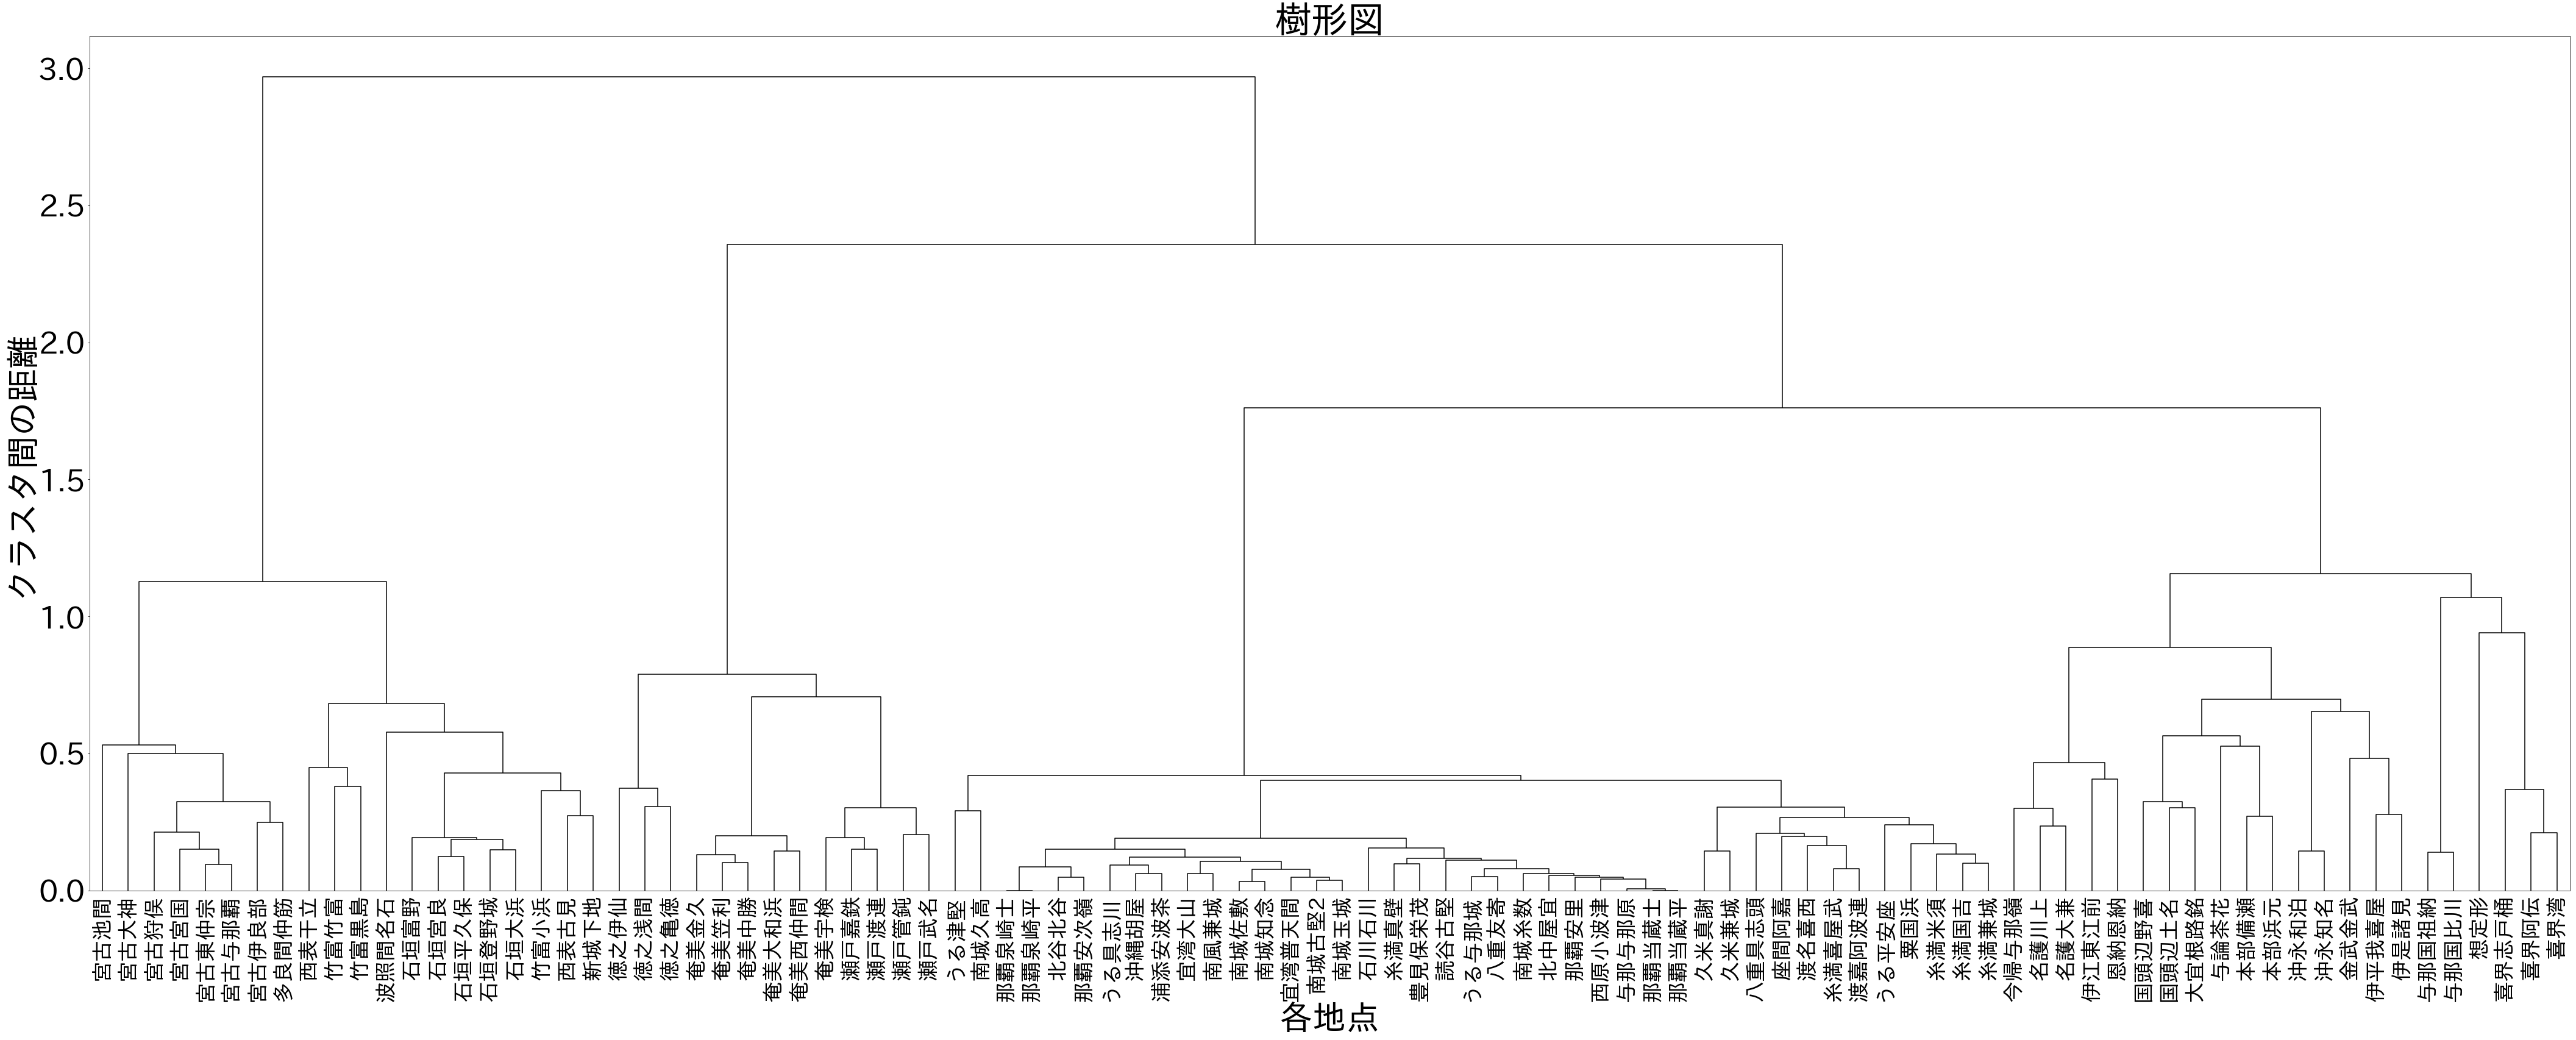

In [18]:
#図の生成
figtitle='樹形図'
himethod='ward'
savefile=basepath.format("gramTri/pattern2/alldend.png")
newdata=np.array(datas)
# newdata=datas.T
pdis=dist.pdist(newdata,'cosine')
z = hierarchy.linkage(pdis, method=himethod,metric="cosine")
plt.figure(figsize=(60,25))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.title(figtitle, fontsize=60)
plt.xlabel('各地点', fontsize=55)
plt.ylabel('クラスタ間の距離', fontsize=55)
# hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0., # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(locates)) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
plt.savefig(savefile)
plt.show()
plt.close()
# 元データのindex順に分類値を表示
threshold = 0.7 * np.max(z[:, 2])
c = hierarchy.fcluster(z, threshold, criterion='distance')
print(c)


In [19]:
threshold = 0.7 * np.max(z[:, 2])
c = hierarchy.fcluster(z, threshold, criterion='distance')
print(c)


[3 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3]


In [20]:
threshold = 0.3 * np.max(z[:, 2])
c = hierarchy.fcluster(z, threshold, criterion='distance')
print(c)

[8 3 3 3 3 3 3 3 3 3 3 7 7 7 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 6 6]


In [21]:
wf=basepath.format("gramTri/pattern2/pcluster.csv")
wdf=pd.DataFrame(kensaku,index=kensaku, columns=["市町村"])
wdf["グループ"]=c
wdf.to_csv(wf,header=False, index=False) #シート名[地点名]

In [ ]:
triDf=pd.read_excel(rfpattern.format(locates[57]), sheet_name=0, header=0, index_col=0)
#図の生成
figtitle='樹形図'
himethod='ward'
# savefile=basepath.format("gramTri/pattern2/alldend2.png")
newdata=triDf.values
newdata=datas.T
pdis=dist.pdist(newdata,'cosine')
z = hierarchy.linkage(pdis, method=himethod,metric="cosine")
plt.figure(figsize=(60,25))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.title(figtitle, fontsize=60)
plt.xlabel('各地点', fontsize=55)
plt.ylabel('クラスタ間の距離', fontsize=55)
# hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0., # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(locates)) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
# plt.savefig(savefile)
plt.show()
plt.close()
# 元データのindex順に分類値を表示
threshold = 0.7 * np.max(z[:, 2])
c = hierarchy.fcluster(z, threshold, criterion='distance')
print(c)